### Import Libraries 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

### read dataset

In [2]:
books_df = pd.read_csv('books.csv')

In [3]:
books_df.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada


In [4]:
books_df.shape

(1031175, 19)

In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [6]:
books_df['Language'].unique()

array(['en', '9', 'de', 'fr', 'es', 'ca', 'it', 'da', 'nl', 'pt', 'gl',
       'ro', 'no', 'el', 'ms', 'la', 'ru', 'zh-CN', 'ga', 'pl', 'tl',
       'th', 'ja', 'cy', 'fa', 'eo', 'gd', 'hi', 'vi', 'ar', 'zh-TW',
       'ko', 'sv'], dtype=object)

### Make separate dataset of English Books

In [7]:
books_eng = books_df[books_df['Language'] == 'en']

In [8]:
books_eng.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [9]:
books_eng['Language'].unique()

array(['en'], dtype=object)

In [10]:
books_eng.shape

(618505, 19)

In [11]:
books_eng.isnull().sum()

Unnamed: 0                 0
user_id                    0
location                   0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_s                      0
img_m                      0
img_l                      0
Summary                    0
Language                   0
Category                   0
city                    7765
state                  12121
country                21044
dtype: int64

In [12]:
books_eng.columns = books_eng.columns.str.lower()

In [13]:
books_eng.head()

,unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,summary,language,category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


### Drop column which are not required

In [14]:
books_eng = books_eng.drop(columns =['unnamed: 0','img_s','img_m','img_l','language'])

In [15]:
books_eng.head(3)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,summary,category,city,state,country
0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,['Social Science'],stockton,california,usa
1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",['Actresses'],timmins,ontario,canada
2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",['Actresses'],ottawa,ontario,canada


In [16]:
books_eng.shape

(618505, 14)

In [17]:
books_eng['year_of_publication']=books_eng['year_of_publication'].astype(int)

In [18]:
books_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618505 entries, 0 to 1031173
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              618505 non-null  int64  
 1   location             618505 non-null  object 
 2   age                  618505 non-null  float64
 3   isbn                 618505 non-null  object 
 4   rating               618505 non-null  int64  
 5   book_title           618505 non-null  object 
 6   book_author          618505 non-null  object 
 7   year_of_publication  618505 non-null  int32  
 8   publisher            618505 non-null  object 
 9   summary              618505 non-null  object 
 10  category             618505 non-null  object 
 11  city                 610740 non-null  object 
 12  state                606384 non-null  object 
 13  country              597461 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(10)
memory usage: 68.4+ M

In [19]:
books_eng['age'] = books_eng['age'].astype(int)

In [20]:
books_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618505 entries, 0 to 1031173
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              618505 non-null  int64 
 1   location             618505 non-null  object
 2   age                  618505 non-null  int32 
 3   isbn                 618505 non-null  object
 4   rating               618505 non-null  int64 
 5   book_title           618505 non-null  object
 6   book_author          618505 non-null  object
 7   year_of_publication  618505 non-null  int32 
 8   publisher            618505 non-null  object
 9   summary              618505 non-null  object
 10  category             618505 non-null  object
 11  city                 610740 non-null  object
 12  state                606384 non-null  object
 13  country              597461 non-null  object
dtypes: int32(2), int64(2), object(10)
memory usage: 66.1+ MB


### Find the number of ratings for each book.

In [21]:
num_ratings = books_eng.groupby('book_title', as_index=False)['rating'].count()

In [22]:
num_ratings

,book_title,rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Beyond IBM: Leadership Marketing and Finance ...,1
3,Dark Justice,1
4,Final Fantasy Anthology: Official Strategy Gu...,4
...,...,...
126669,together by christmas,9
126670,why I'm like this : True Stories,11
126671,"Â¡Corre, perro, corre!",2
126672,Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2),1


In [23]:
#sort data in ascending order
most_ratings = num_ratings.sort_values(by='rating', ascending=False).head(10)

In [24]:
most_ratings

,book_title,rating
123495,Wild Animus,2502
94208,The Da Vinci Code,886
103805,The Nanny Diaries: A Novel,828
15243,Bridget Jones's Diary,815
108227,The Secret Life of Bees,768
26855,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
106914,The Red Tent (Bestselling Backlist),723
109970,The Summons,654
3063,A Painted House,652
82403,Snow Falling on Cedars,618


In [25]:
y = most_ratings['book_title']
width = most_ratings['rating']

Text(0.5, 0, 'Number of Ratings')

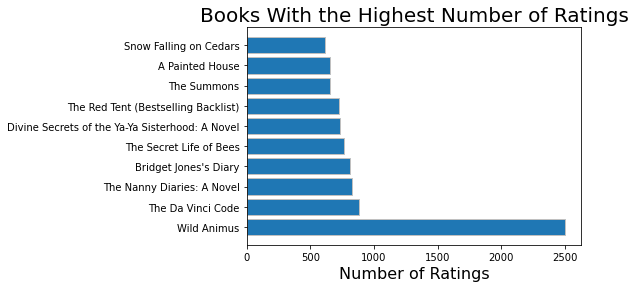

In [26]:
most_viz = plt.barh(y, width, edgecolor='silver')
plt.title('Books With the Highest Number of Ratings',fontsize=20)
plt.xlabel('Number of Ratings', fontsize=16)

### Find the average of rating for books 

In [27]:
avg_ratings = books_eng.groupby('book_title', as_index=False)['rating'].mean()

In [28]:
avg_ratings

,book_title,rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Beyond IBM: Leadership Marketing and Finance ...,0.000000
3,Dark Justice,10.000000
4,Final Fantasy Anthology: Official Strategy Gu...,5.000000
...,...,...
126669,together by christmas,3.111111
126670,why I'm like this : True Stories,4.272727
126671,"Â¡Corre, perro, corre!",5.000000
126672,Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2),0.000000


In [29]:
avg_ratings.sort_values(by='rating', ascending=False)

,book_title,rating
27444,Donna Kooler's 555 Christmas Cross-Stitch Designs,10.0
28055,Drawing for the Artistically Undiscovered,10.0
91272,The Book of Job,10.0
91270,The Book of Jewish Sacred Practices: Clal's Gu...,10.0
91268,The Book of Jewish Food: An Odyssey from Samar...,10.0
...,...,...
82336,Snakes,0.0
34722,For Love Of Zach (Love Inspired (Numbered)),0.0
82339,Snakes Are Nothing to Sneeze at (Redfeather Book),0.0
34720,"For Love Of Power (Harlequin Romance, No 3194)",0.0


In [30]:
top10_avg=avg_ratings.sort_values(by='rating', ascending=False).head(10)
y1 = top10_avg['book_title']
width1 = top10_avg['rating']


Text(0.5, 0, 'Number of Ratings')

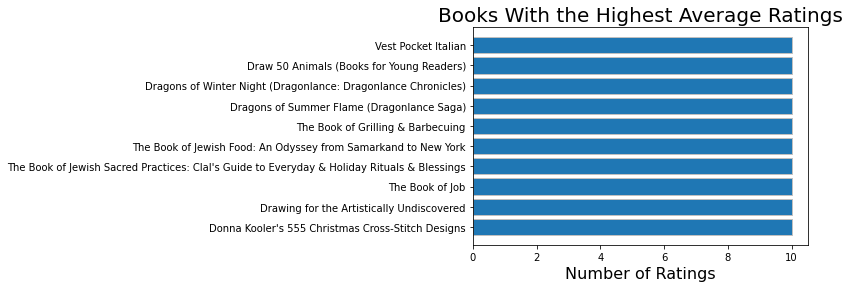

In [31]:
plt.barh(y1, width1, edgecolor='silver')
plt.title('Books With the Highest Average Ratings',fontsize=20)
plt.xlabel('Number of Ratings', fontsize=16)

In [32]:
num_ratings.sort_values(by='rating', ascending=False).head(25)

,book_title,rating
123495,Wild Animus,2502
94208,The Da Vinci Code,886
103805,The Nanny Diaries: A Novel,828
15243,Bridget Jones's Diary,815
108227,The Secret Life of Bees,768
26855,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
106914,The Red Tent (Bestselling Backlist),723
109970,The Summons,654
3063,A Painted House,652
82403,Snow Falling on Cedars,618


### merge both total number and average rating

In [33]:
ratings = num_ratings.merge(avg_ratings, how='inner', on='book_title')

In [34]:
ratings

,book_title,rating_x,rating_y
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
3,Dark Justice,1,10.000000
4,Final Fantasy Anthology: Official Strategy Gu...,4,5.000000
...,...,...,...
126669,together by christmas,9,3.111111
126670,why I'm like this : True Stories,11,4.272727
126671,"Â¡Corre, perro, corre!",2,5.000000
126672,Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2),1,0.000000


In [35]:
ratings = ratings.rename(columns={'rating_x': 'num_rating'})

In [36]:
ratings = ratings.rename(columns={'rating_y': 'avg_rating'})

In [37]:
ratings

,book_title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
3,Dark Justice,1,10.000000
4,Final Fantasy Anthology: Official Strategy Gu...,4,5.000000
...,...,...,...
126669,together by christmas,9,3.111111
126670,why I'm like this : True Stories,11,4.272727
126671,"Â¡Corre, perro, corre!",2,5.000000
126672,Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2),1,0.000000


In [38]:
ratings['num_rating'].sort_values(ascending=False).head(25)

123495    2502
94208      886
103805     828
15243      815
108227     768
26855      732
106914     723
109970     654
3063       652
82403      618
110452     615
40730      571
4078       542
109856     542
115441     531
37710      526
47555      506
99243      506
92900      480
38580      470
59584      455
106774     451
100500     451
115660     443
54174      434
Name: num_rating, dtype: int64

### To find the top books, the data frame is subset for the books with 450 or more ratings. This can help determine which books are rated the highest while also having a significant number of ratings.

In [39]:
ratings_over_450 = ratings[ratings['num_rating'] >= 450]

top_books = ratings_over_450.sort_values(by='avg_rating', ascending=False).head(10)

In [40]:
ratings_over_450

,book_title,num_rating,avg_rating
3063,A Painted House,652,3.190184
4078,A Time to Kill,542,3.081181
15243,Bridget Jones's Diary,815,3.527607
26855,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732,3.448087
37710,Girl with a Pearl Earring,526,4.218631
38580,Good in Bed,470,4.040426
40730,Harry Potter and the Sorcerer's Stone (Harry P...,571,4.900175
47555,Interview with the Vampire,506,3.535573
59584,Message in a Bottle,455,2.872527
82403,Snow Falling on Cedars,618,3.242718


In [41]:
top_books

,book_title,num_rating,avg_rating
40730,Harry Potter and the Sorcerer's Stone (Harry P...,571,4.900175
94208,The Da Vinci Code,886,4.647856
108227,The Secret Life of Bees,768,4.442708
106914,The Red Tent (Bestselling Backlist),723,4.334716
37710,Girl with a Pearl Earring,526,4.218631
38580,Good in Bed,470,4.040426
115441,Timeline,531,3.757062
47555,Interview with the Vampire,506,3.535573
103805,The Nanny Diaries: A Novel,828,3.530193
15243,Bridget Jones's Diary,815,3.527607


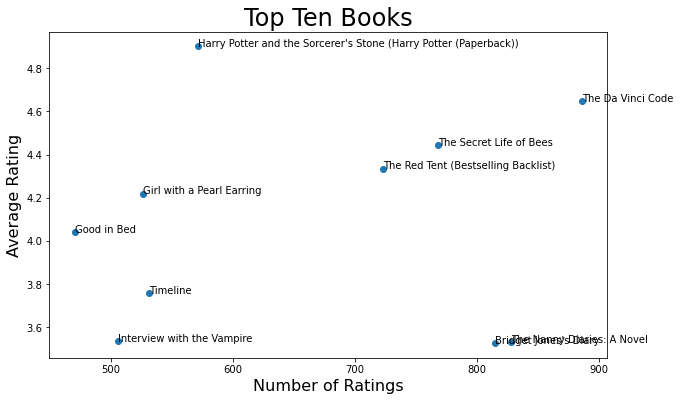

In [42]:
x = list(top_books['num_rating'])
y = list(top_books['avg_rating'])
labels = list(top_books['book_title'])
fig = plt.figure(figsize = (10, 6))
plt.scatter(x, y)
plt.title('Top Ten Books', fontsize=24)
plt.xlabel('Number of Ratings', fontsize=16)
plt.ylabel('Average Rating', fontsize=16)

for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]), size=10)

###  Age ranges for the users can be insightful especially when applied to the most popular books in the dataset.

In [43]:

#Subset dataframe for users that rated book
def age(Book_name):
    hp_readers = books_eng[books_eng['book_title'] ==Book_name]

    #Age ranges for book readers.
    hp_age = hp_readers.groupby('age', as_index=False)['user_id'].nunique()

    #Create a new dataframe with age ranges.
    columns = ['age_range', 'percentage']
    age_ranges = pd.DataFrame(index=[0, 1, 2, 3], columns=columns)

    eighteen_under = 0
    thirty_under = 0
    thirty_five_under = 0
    thirty_five_plus = 0

    for index, row in hp_readers.iterrows():
        if row['age'] in range(12, 19):
            eighteen_under += 1
        elif row['age'] in range(19, 30):
            thirty_under += 1

        elif row['age'] in range(30, 40):
            thirty_five_under += 1

        elif row['age'] >= 41:
            thirty_five_plus += 1

    age_ranges['age_range'].iloc[0] = '12-18'
    age_ranges['age_range'].iloc[1] = '19-29'
    age_ranges['age_range'].iloc[2] = '30-40'
    age_ranges['age_range'].iloc[3] = '41+'

    #Find the percentage of users that fall within each age range.
    age_ranges['percentage'].iloc[0] = round(eighteen_under/len(hp_readers)*100, 1)
    age_ranges['percentage'].iloc[1] = round(thirty_under/len(hp_readers)*100, 1)
    age_ranges['percentage'].iloc[2] = round(thirty_five_under/len(hp_readers)*100, 1)
    age_ranges['percentage'].iloc[3] = round(thirty_five_plus/len(hp_readers)*100, 1)
    
    return age_ranges


In [44]:
Bookname="Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"
age_r=age(Bookname)

In [45]:
age_r

,age_range,percentage
0,12-18,6.5
1,19-29,26.3
2,30-40,49.7
3,41+,15.9


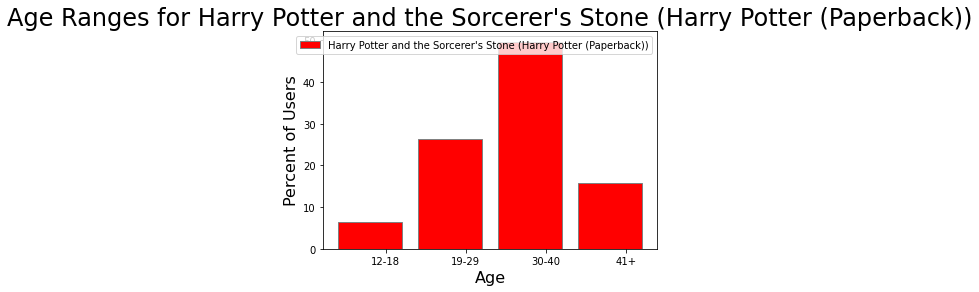

In [46]:
percent = list(age_r['percentage'])
x = list(age_r['age_range'])
_x = np.arange(len(x))

plt.bar(_x - 0.2, percent, color='red',edgecolor='Gray', label=Bookname)
plt.xticks(_x, x)
plt.title('Age Ranges for '+Bookname, fontsize=24)
plt.ylabel('Percent of Users', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.legend()
plt.show()

#### The dataset was truncated to 200k results because using sklearn's cosine similarity function required to much memory with the full dataset.

In [47]:
book_summary = books_eng[1:200000].groupby(['book_title', 'summary',], as_index=False)['rating'].mean()

In [48]:
book_summary

,book_title,summary,rating
0,10 Commandments Of Dating,Christian Library of Lancaster Collection.,6.25
1,100 Best-Loved Poems (Dover Thrift Editions),My Captain!&quot;; Dickinson: &quot;This Is My...,6.00
2,1001 Brilliant Ways to Checkmate,Offers a comprehensive collection of checkmate...,9.00
3,101 Bright Ideas: Esl Activities for All Ages,Suggests 101 activities and games for ESL stud...,0.00
4,101 Dinosaur Jokes,A collection of jokes about dinosaurs includes...,4.20
...,...,...,...
7520,"\Even Monkeys Fall from Trees\"" and Other Japa...",Here is a collection of the one hundred most c...,3.00
7521,"\I Won't Learn from You\"": And Other Thoughts ...",A collection of essays explore the educator&#3...,3.00
7522,"\More More More,\"" Said the Baby""","Here are Little Guy, Little Pumpkin,and Little...",0.00
7523,"\The Twilight of the Idols (Classics S.)""",Donation.,0.00


In [49]:
book_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book_title  7525 non-null   object 
 1   summary     7525 non-null   object 
 2   rating      7525 non-null   float64
dtypes: float64(1), object(2)
memory usage: 176.5+ KB


In [50]:
book_summary.shape

(7525, 3)

In [51]:
from nltk.tokenize import sent_tokenize

In [52]:
book_summary['book_title'].drop_duplicates(inplace=True)

In [53]:
tfidf = TfidfVectorizer(stop_words='english')

In [54]:
tfidf

TfidfVectorizer(stop_words='english')

In [55]:
book_summary['summary'] = book_summary['summary'].fillna('')

In [56]:
tfidf_matrix = tfidf.fit_transform(book_summary['summary'])

In [57]:
tfidf_matrix

<7525x21154 sparse matrix of type '<class 'numpy.float64'>'
	with 122219 stored elements in Compressed Sparse Row format>

In [58]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [59]:
cosine_sim

array([[1.       , 0.       , 0.0853589, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.0853589, 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

In [60]:
indices = pd.Series(book_summary.index,index=book_summary['book_title']).drop_duplicates()

In [61]:
def get_recommendations(book_title, cosine_sim=cosine_sim):
    idx = indices[book_title]

    # Similarity scores
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores =  similarity_scores[1:10]
    book_indices = [i[0] for i in similarity_scores]

    book= sort_recommendation(book_summary[['book_title','rating']].iloc[book_indices])
    return book

def sort_recommendation(book1):
    books=book1.sort_values(by='rating', ascending=False)
    return books

### Get Recommendation

In [62]:
get_recommendations("Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))")

,book_title,rating
2300,Harry Potter and the Goblet of Fire (Book 4),6.541237
2303,Harry Potter and the Prisoner of Azkaban (Book 3),6.467005
2301,Harry Potter and the Order of the Phoenix (Boo...,5.571856
565,Awful End (Eddie Dickens Trilogy S.),5.333333
2306,Harry Potter and the Sorcerer's Stone (Harry P...,4.900175
2304,Harry Potter and the Sorcerer's Stone (Book 1),4.692308
6105,"The Mystery Cruise (Boxcar Children Mysteries,...",3.333333
315,Aerie Tik Tok of Oz: Defiant-Cn16dp,1.882353
6129,The New Baby,1.400000


In [63]:
get_recommendations('Wild Animus')

,book_title,rating
859,Breaking Down the Wall of Silence: The Liberat...,10.000000
2169,"Godel, Escher, Bach: An Eternal Golden Braid",7.900000
7367,Wild Man's Journey: Reflections on Male Spirit...,6.500000
958,Call of the Wild and Selected Stories,6.200000
6591,The Third Miracle : A Novel,3.142857
1197,Confessions of an English Opium Eater,2.000000
4419,Second Ring of Power,1.250000
5497,The Dog I.Q. Test,1.000000
511,Archery Anatomy: An Introduction to Techniques...,0.000000
